### Exercise 1
Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all as-pects of your figures, including the regions $R_1$, $R_2$, $\dots$, the cutpoints $t_1$, $t_2$, $\dots$, and so forth.

*Hint: Your result should look something like Figures 8.1 and 8.2.*

### Solution 1

Suppose we want to predict *height* with *weight* and *age*.

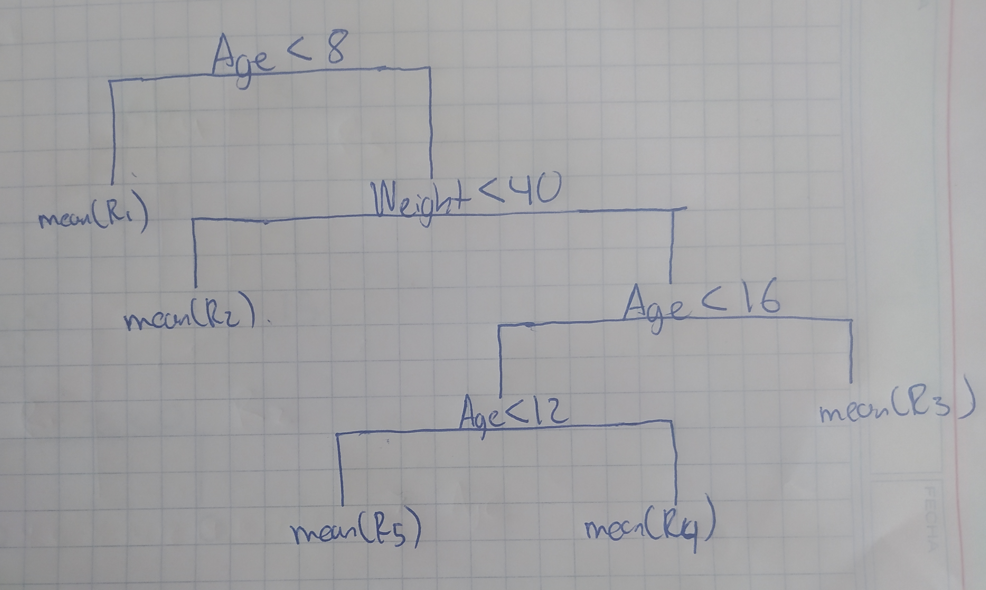

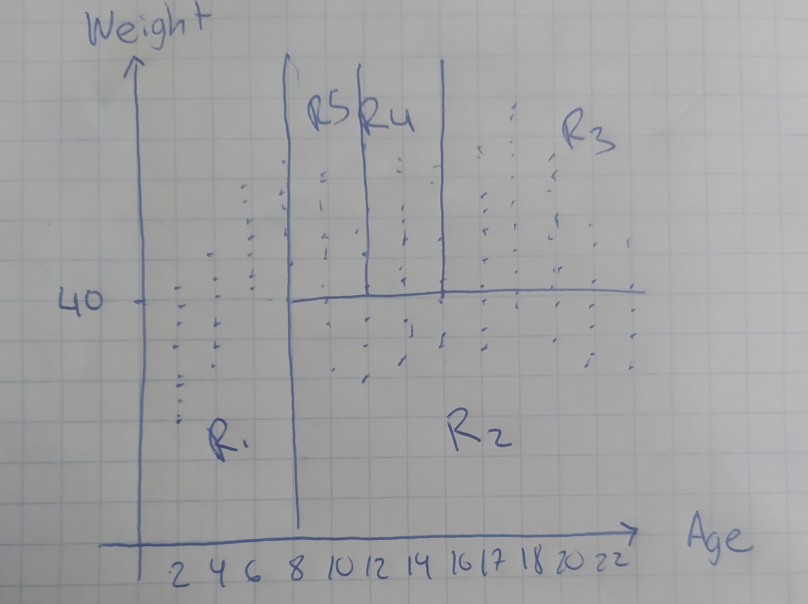

### Exercise 2
It is mentioned in Section 8.2.3 that boosting using depth-one trees (or *stumps*) leads to an *additive* model: that is, a model of the form**

$$f(X) = \sum_{j = 1}^p f_j(X_j)$$

Explain why this is the case. You can begin with (8.12) in
Algorithm 8.2.

### Solution 2

The Boosting model is:

$$\hat{f}(X) = \sum_{b = 1}^B \lambda \hat{f}^b(X)$$

Where $X = (X_1, \dots, X_p)$.

But in this case in the $b-th$ iteration we have a tree with just one node, it means the tree depends just of one variable, say $X_{j_b}$ then with abuse of notation we can write:

$$\hat{f}^b(X) = \hat{f}^b(X_{j_b})$$

Grouping the terms in the Boosting model, we have:

$$\hat{f}(X) = \sum_{j = 1}^p f_j(X_j)$$

Where $f_j$'s are appropriate functions.

### Exercise 3

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$. The x-axis should display $\hat{p}_{m1}$, ranging from $0$ to $1$, and the y-axis should display the value of the Gini index, classification error, and entropy.

*Hint: In a setting with two classes, $\hat{p}_{m1}$ = 1 − $\hat{p}_{m2}$. You could make this plot by hand, but it will be much easier to make in R.*

### Solution 3

In the case of two classes, we have:

Gini index:

$$2\hat{p}_{m1}(1- \hat{p}_{m1})$$

Classification error:

$$1- \max{\{\hat{p}_{m1}, 1-\hat{p}_{m1}\}}$$
Entropy:

$$-\hat{p}_{m1}\log{\hat{p}_{m1}} -(1-\hat{p}_{m1})\log{1-\hat{p}_{m1}} $$

See in the plots that Gini Index and Entropy have a similar shape, in fact 2 times Gini Index is approximate equal to one time entropy.

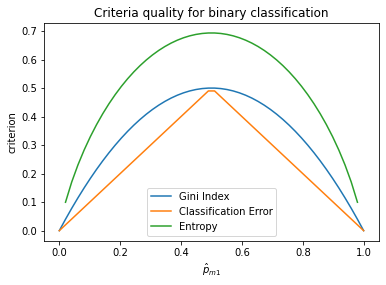

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

gini = lambda p: 2*p*(1-p)
class_error = lambda p: 1 - np.max([p, 1 - p])
entropy = lambda p: -p*np.log(p) - (1 - p)*np.log(1 - p)

x_axis = np.linspace(0, 1, 50)
plt.plot(x_axis, [gini(p) for p in x_axis], label = "Gini Index")
plt.plot(x_axis, [class_error(p) for p in x_axis], label = "Classification Error")
plt.plot(x_axis, [entropy(p) for p in x_axis], label = "Entropy")
plt.title("Criteria quality for binary classification")
plt.xlabel("$\hat{p}_{m1}$")
plt.ylabel("criterion")
plt.legend();

### Exercise 4

This question relates to the plots in Figure 8.14.:

a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of $Y$ within each region.

b) Create a diagram similar to the left-hand panel of Figure 8.14, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

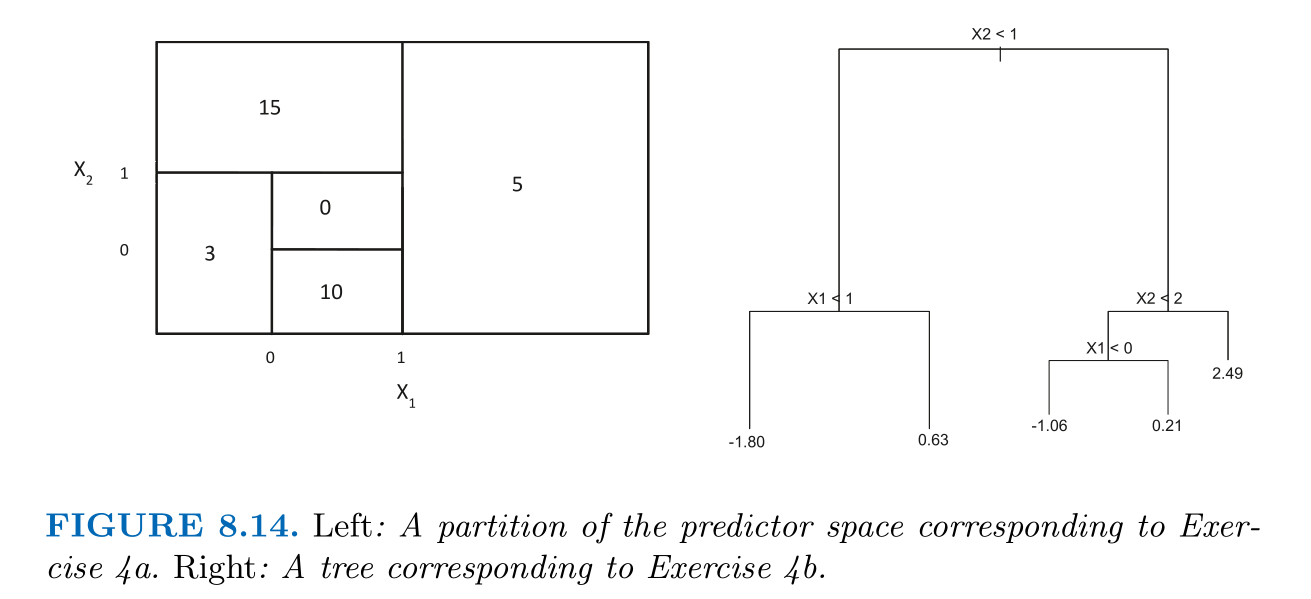

### Solution 4

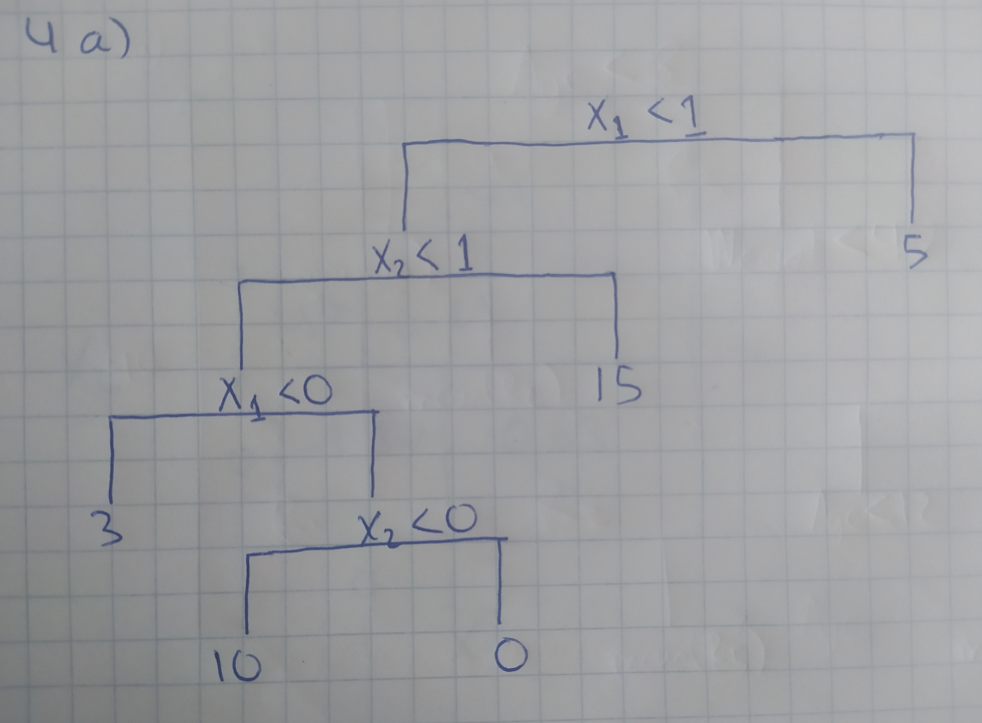

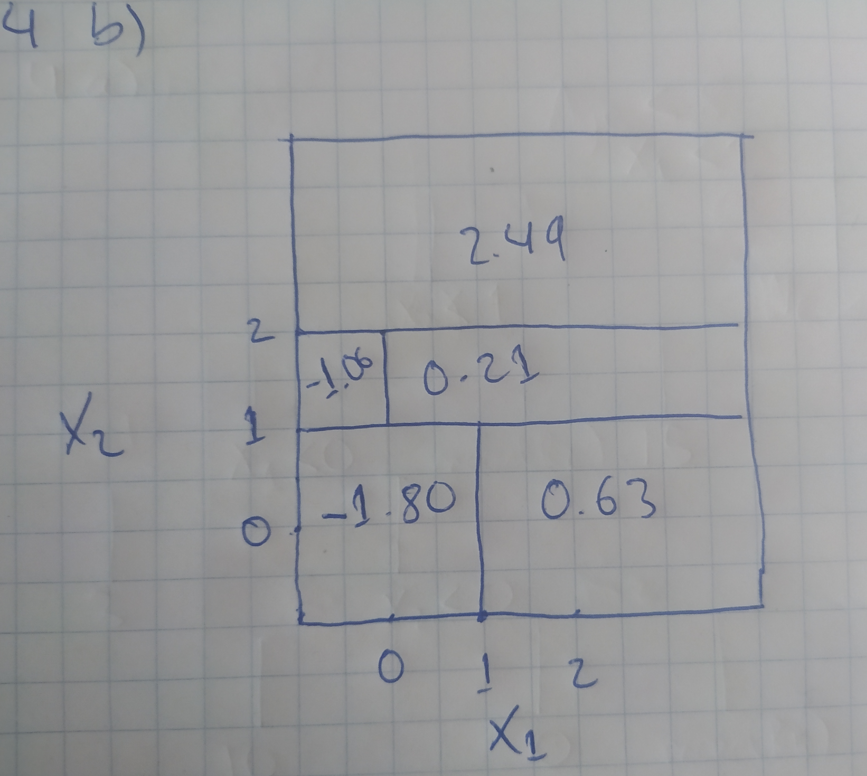

### Exercise 5

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of 

$$P(\textit{Class is Red}|X):0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, \textit{ and } 0.75.$$

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

### Solution 5

In [3]:
import numpy as np
red_probabilities = np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])

# Majority Vote
classifier = lambda p: "red" if p > 1/2 else "green"
print(np.unique(list(map(classifier, red_probabilities)), return_counts = True))
# In this case red is the classification

# Average Probability
print(red_probabilities.mean())
# In this case green is the classification

(array(['green', 'red'], dtype='<U5'), array([4, 6], dtype=int64))
0.45


### Exercise 6

Provide a detailed explanation of the algorithm that is used to fit a regression tree.

### Solution 6

******
**Algorithm**: Building a Regression Tree

******
1.  Use recursive binary splitting to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.

2.  Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of $\alpha$.

3. Use $K$-fold cross-validation to choose $\alpha$. That is, divide the training observations into $K$ folds. For each $k = 1, \dots, K$:

    a) Repeat Steps 1 and 2 on all but the $k$th fold of the training data.
    
    b) Evaluate the mean squared prediction error on the data in the left-out kth fold, as a function of $\alpha$. 
    
    Average the results for each value of $\alpha$, and pick α to minimize the average error.

4. Return the subtree from Step 2 that corresponds to the chosen value of $\alpha$.
******

******
**Explanation**: Building a Regression Tree

******
1. To do binary splitting, first we need to select a predictor $X_j$ and a cutpoint $s$ such that $\{X|X_j < s\}$ and $\{X|X_j \geq s\}$ leads to the greatest possible reduction in RSS. In detail if we write:
    $$R_1(j, s)\{X|X_j < s\}$$
    $$R_2(j, s)\{X|X_j \geq s\}$$
    we seek the value of $j$ and $s$ that minimize the RSS:
    $$\large \sum_{i:x_i \in R_1(j, s)}(y_i - \hat{y}_{R_1}) + \sum_{i:x_i \in R_2(j, s)}(y_i - \hat{y}_{R_2})$$
    Where $\hat{y}_{R_i}$ is the mean response for the training observations in $R_i$.
    Next we repeat the process for each resulting nodes, if we split one of the two previously identified regions instead of the predictor space. Now we have three nodes. We repeat the process until a stopping criterion is reached(in this case when each terminal node has fewer than some minimum number of observations).
    
    **Note**:
    The recursive binary splitting approach is **top-down** because it begins at the top of the tree and then successively splits thepredictor space. It is **greedy** because at each step of the tree-building process, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step.

2. With cost complexity pruning to the tree obtained in the step 1. We get a sequence like that.
    $T_{\alpha_1}, T_{\alpha_2}, \dots, T_{\alpha_k}$
    Where $T_{\alpha_i}$ minimizes:
    $$\large \sum_{m = 1}^{|T|}\sum_{i:x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha|T|\$$

3. To choose the best value of $\alpha$ in the step 2 we need to use $K$-fold cross validation:

    a) Repeat Steps 1 and 2 on all but the $k$th fold of the training data.
    
    b) Evaluate the mean squared prediction error on the data in the left-out kth fold, as a function of $\alpha$. 
    
    Average the results for each value of $\alpha$, and pick α to minimize the average error.
4. Return the subtree from Step 2 that corresponds to the chosen value of $\alpha$.
******